**Math Modeling**

**Chapter 6 #6.3**

**Vance Turnewitsch**

Given the data:

$$\begin{array}{c|cccc}
x & 1.0 & 1.7 & 2.3 & 3.1 \\ \hline
y & 0.6 & 1.4 & 3.2 & 5.2 \\
\end{array}$$

Find the best fit of the line $y=mx+b$ in the sense of:

$\min(e)=\sum_{j=1}^n |y_j-\psi(x_j,a)|$

Thus we have the following task:

$\min(e)=\big|0.6-m-b\big|+\big|1.4-1.7m-b\big|+\big|3.2-2.3m-b\big|+\big|5.2-3.2m-b\big|$

Which since we have absolute values, is effectively the same as (we make the largest as small as is possible then automatically we minimize all:

$\min\{\max\{\big|0.6-m-b\big|,\big|1.4-1.7m-b\big|,\big|3.2-2.3m-b\big|,\big|5.2-3.2m-b\big|\}\}$

Unfortunately, this is analytically a difficult problem (we cannot differentiate); thus, we attack it numerically. First, let's see what this data looks like so that we may gain some insight:

In [53]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
# We define the x and y data
x = [1.0,1.7,2.3,3.1]
y = [0.6,1.4,3.2,5.2]

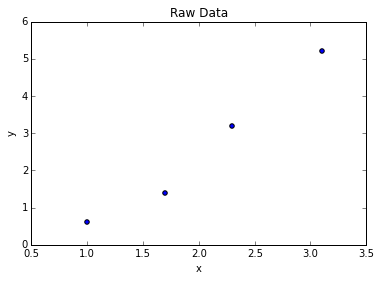

In [55]:
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Raw Data')

As we can see, there are clearly some values of $m,b$ that will not minimize $e$. We only need to search for specific values. Thus, we will minimize within the space:

$$b\in [-5,8]$$

$$m\in [0,5]$$

which we are confident we will find the minimizer. We also try a finite number of points; thus, this is only an approximation.

In [56]:
b = np.linspace(-5,8,100)
m = np.linspace(0,5,100)

In [57]:
def fun1(mi,bi):
    return np.max(np.abs(np.array([[0.6-mi-bi],[1.4-1.7*mi-bi],[3.2-2.3*mi-bi],[5.2-3.2*mi-bi]])))

In [58]:
minVal = (100,b[0],m[0])
count = 0
for bi in b:
    for mi in m:
        val = fun1(mi,bi)
        if val < minVal[0]:
            minVal = (val,bi,mi)
        count += 1
print "Minimum:",minVal[0]," at b=",minVal[1]," and m=",minVal[2]

Minimum: 0.357575757576  at b= -1.84848484848  and m= 2.12121212121


Thus, the best fitting line is: $y=2.12x-1.84$

We plot this line on the data for visual:

In [59]:
x2 = np.linspace(0.5,3.5,100)
yFit = 2.12*x2 - 1.84

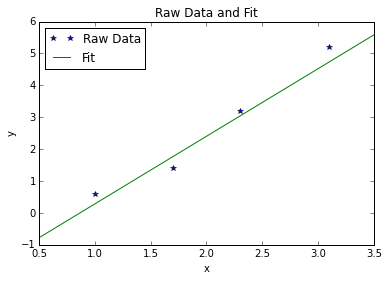

In [60]:
plt.plot(x,y,"*",label="Raw Data")
plt.plot(x2,yFit,label='Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Raw Data and Fit')
plt.legend(loc=2)